# Generate Python Code

Pandas is one of my favorite Python module. So, I used GPT3 language model to generate code from pandas. A special note to all my teachers. You are under threat ! lolz

# 1- Import key Modules

In [1]:
#!pip install openai

#for only 1st time

In [2]:
import json
import openai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2- Get secret key

from openai website

In [3]:
with open('GPT_SECRET_KEY.json') as f:
    data = json.load(f)

In [4]:
openai.api_key = data["API_KEY"]

In [5]:
from gpt import GPT
from gpt import Example

In [6]:
gpt = GPT(engine="davinci",
          temperature=0.5,
          max_tokens=100)

# 3- Create sample dataframe

In [7]:
df = pd.DataFrame({"Gender": ["boy", "boy", "boy", "boy", "boy",
                         "girl", "girl", "girl", "girl"],
                   "Division": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "Marks": [50, 55, 67, 85, 44, 84, 65, 56, 87]})

In [8]:
df

,Gender,Division,Marks
0,boy,one,50
1,boy,one,55
2,boy,one,67
3,boy,two,85
4,boy,two,44
5,girl,one,84
6,girl,one,65
7,girl,two,56
8,girl,two,87


### Adding Examples for GPT Model

In [9]:
gpt.add_example(Example('How many unique values in Division Column?', 
                        'df["Division"].nunique()'))

In [10]:
gpt.add_example(Example('Find the Division of boy who scored 55 marks', 
                        'df.loc[(df.loc[:, "Gender"] == "boy") & (df.loc[:, "Marks"] == 55), "Division"]'))

In [11]:
gpt.add_example(Example('Find the average Marks scored by Girls', 
                        'np.mean(df.loc[(df.loc[:, "Gender"] == "girl"), "Marks"])'))

# 4- Generate Code

### 4.1. Example 1

In [12]:
prompt = "Display Division of girl who scored maximum marks"

In [13]:
gpt.get_top_reply(prompt)

'output: df.loc[(df.loc[:, "Gender"] == "girl") & (df.loc[:, "Marks"] == max(df.loc[:, "Marks"])), "Division"]\n'

This is the code generated. However, I need to clean it to make it "copy-paste" in other notebook directly.

Also I want to see output of my code i.e result

In [14]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

output: df.loc[(df.loc[:, "Gender"] == "girl") & (df.loc[:, "Marks"] == max(df.loc[:, "Marks"])), "Division"]



8    two
Name: Division, dtype: object

much better. I did copy and paste and it is working perfectly and providing same results :)

### 4.2. Example 2

In [15]:
prompt = "Find the median Marks scored by Boys"

In [16]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

output: np.median(df.loc[(df.loc[:, "Gender"] == "boy"), "Marks"])



55.0

# 5- Using Visualization


Matplotlib

In [17]:
df = pd.read_csv("iris.csv")

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 5.1. Add example for code generation

In [19]:
gpt.add_example(Example('Plot Scatter Plot between Sepal Length & Sepal Width', 
                        "plt.scatter(df['sepal_length'], df['sepal_width'])"))

In [20]:
gpt.add_example(Example('Plot Bar Plot of Species', 
                        "sns.countplot('species',data=df)"))

In [21]:
gpt.add_example(Example('Plot a Joint Plot between Sepal Length & Petal Length', 
                        "sns.jointplot(x='sepal_length',y='petal_length',data=df)"))

In [22]:
gpt.add_example(Example('Show me the histogram of Petal Length', 
                        "plt.hist(df['petal_length'])"))

More examples, better code generation from GPT3 lang. model

### 5.2. Generating code 

#### 5.2.a. Example 1

In [23]:
prompt = "Show me the scatter plot between petal length and sepal width"

output: plt.scatter(df['petal_length'], df['sepal_width'])



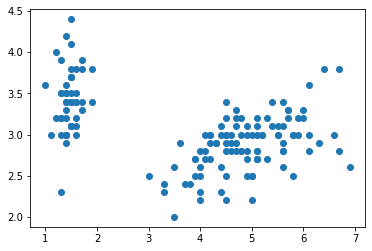

In [24]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

#### 5.2.b. Example 2

In [25]:
prompt = "Show me the Joint Plot between Petal Length & Petal Length"

output: sns.jointplot(x='petal_length',y='petal_length',data=df)



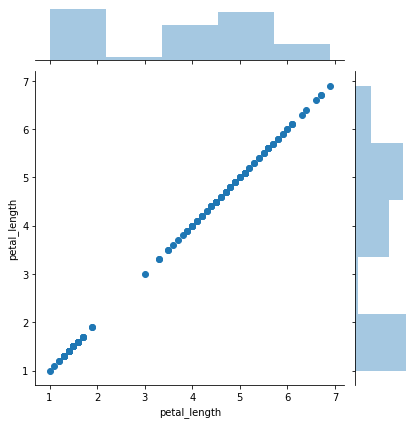

In [26]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

#### 5.2.c. Example 3

In [27]:
prompt = "Show me the Distribution of Sepal Length"

output: plt.hist(df['sepal_length'],bins=50)



(array([ 1.,  3.,  1.,  0.,  4.,  2.,  5.,  0.,  6., 10.,  0.,  9.,  4.,
         1.,  0.,  6.,  7.,  0.,  6.,  8.,  7.,  0.,  3.,  6.,  0.,  6.,
         4.,  9.,  0.,  7.,  5.,  2.,  0.,  8.,  3.,  0.,  4.,  1.,  1.,
         0.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  1.]),
 array([4.3  , 4.372, 4.444, 4.516, 4.588, 4.66 , 4.732, 4.804, 4.876,
        4.948, 5.02 , 5.092, 5.164, 5.236, 5.308, 5.38 , 5.452, 5.524,
        5.596, 5.668, 5.74 , 5.812, 5.884, 5.956, 6.028, 6.1  , 6.172,
        6.244, 6.316, 6.388, 6.46 , 6.532, 6.604, 6.676, 6.748, 6.82 ,
        6.892, 6.964, 7.036, 7.108, 7.18 , 7.252, 7.324, 7.396, 7.468,
        7.54 , 7.612, 7.684, 7.756, 7.828, 7.9  ]),
 <a list of 50 Patch objects>)

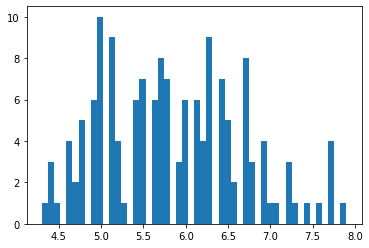

In [28]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

This all is magical and I shall use more fun project using GPT3. 